In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import scanpy as sc
import scipy as sp

import sys
import os
sys.path.append(os.path.abspath("./utility_functions"))

import rz_functions as rz
import ng_functions as ng
import rz_utility_spring as srz

from time import time
#from seaborn import kdeplot, distplot, pairplot
#from seaborn import Pairgrid

In [3]:
cell_subset_dict = {'B cells' : 'B cells',
                     'Basophils' : 'Basophils',
                     'DC1' : 'MoMacDC',
                     'DC2' : 'MoMacDC',
                     'DC3' : 'MoMacDC',
                     'Mac1' : 'MoMacDC',
                     'Mac2' : 'MoMacDC',
                     'Mac3' : 'MoMacDC',
                     'Mac4' : 'MoMacDC',
                     'Mono1' : 'MoMacDC',
                     'Mono2' : 'MoMacDC',
                     'Mono3' : 'MoMacDC',
                     'MonoDC' : 'MoMacDC',
                     'N1' : 'Neutrophils',
                     'N2' : 'Neutrophils',
                     'N3' : 'Neutrophils',
                     'N4' : 'Neutrophils',
                     'N5' : 'Neutrophils',
                     'N6' : 'Neutrophils',
                     'N6' : 'Neutrophils',
                     'NK cells' : 'NK cells',
                     'T1' : 'T cells',
                     'T2' : 'T cells',
                     'T3' : 'T cells',
                     'pDC' : 'pDC'}


In [4]:
adata = sc.read_h5ad('backups/tox_marie_all_cells_umap35358x22631_backup_200407_11h05.h5ad')
adata

AnnData object with n_obs × n_vars = 35358 × 2058 
    obs: 'barcode', 'group', 'library_name', 'marker', 'max_mt', 'min_tot', 'mito_frac', 'n_counts', 'n_genes', 'pool', 'tissue', 'treatment', 'louvain'
    uns: 'spring_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [5]:
adata_raw = sc.read_h5ad('backups/tox_marie_filtered_merged_35358x22631_backup_200404_17h27.h5ad')

adata_raw[:,['Il12b']].X = adata_raw[:,['Il12b', 'eYFP']].X.sum(1)
adata_raw[:,['eYFP']].X = 0


sc.pp.normalize_total(adata_raw, target_sum=1e4)

/home/ng136/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/sparse/_index.py:118: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/ng136/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [6]:
#loglikelihoods = sp.sparse.load_npz('backups/loglikelihoods_bay_classif_tox_marie_all_cells_200407_11h02.npz')
logls = np.load('backups/loglikelihoods_bay_classif_tox_marie_all_cells_200407_11h02.npz', allow_pickle=True)

mostlikely_subset = pd.DataFrame(logls['data'], index=logls['index'], columns=logls['columns']).idxmax()
mostlikely_subset = pd.Series(mostlikely_subset, dtype='category')
mostlikely_subset.index = adata.obs.index

mostlikely_celltype = mostlikely_subset.map(cell_subset_dict).astype('category')

In [7]:
adata.obs['cell_type'] = mostlikely_celltype
adata.obs['minor_subset'] = mostlikely_subset

adata_raw.obs = adata.obs
adata_raw.uns = adata.uns
adata_raw.obsm = adata.obsm
#adata_raw.varm = adata.varm

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


figures/treatment_NT_minor_subset_200409_17h32_1.pdf done!
figures/treatment_Trx_minor_subset_200409_17h32_2.pdf done!


[<Figure size 3000x2000 with 1 Axes>, <Figure size 3000x2000 with 1 Axes>]

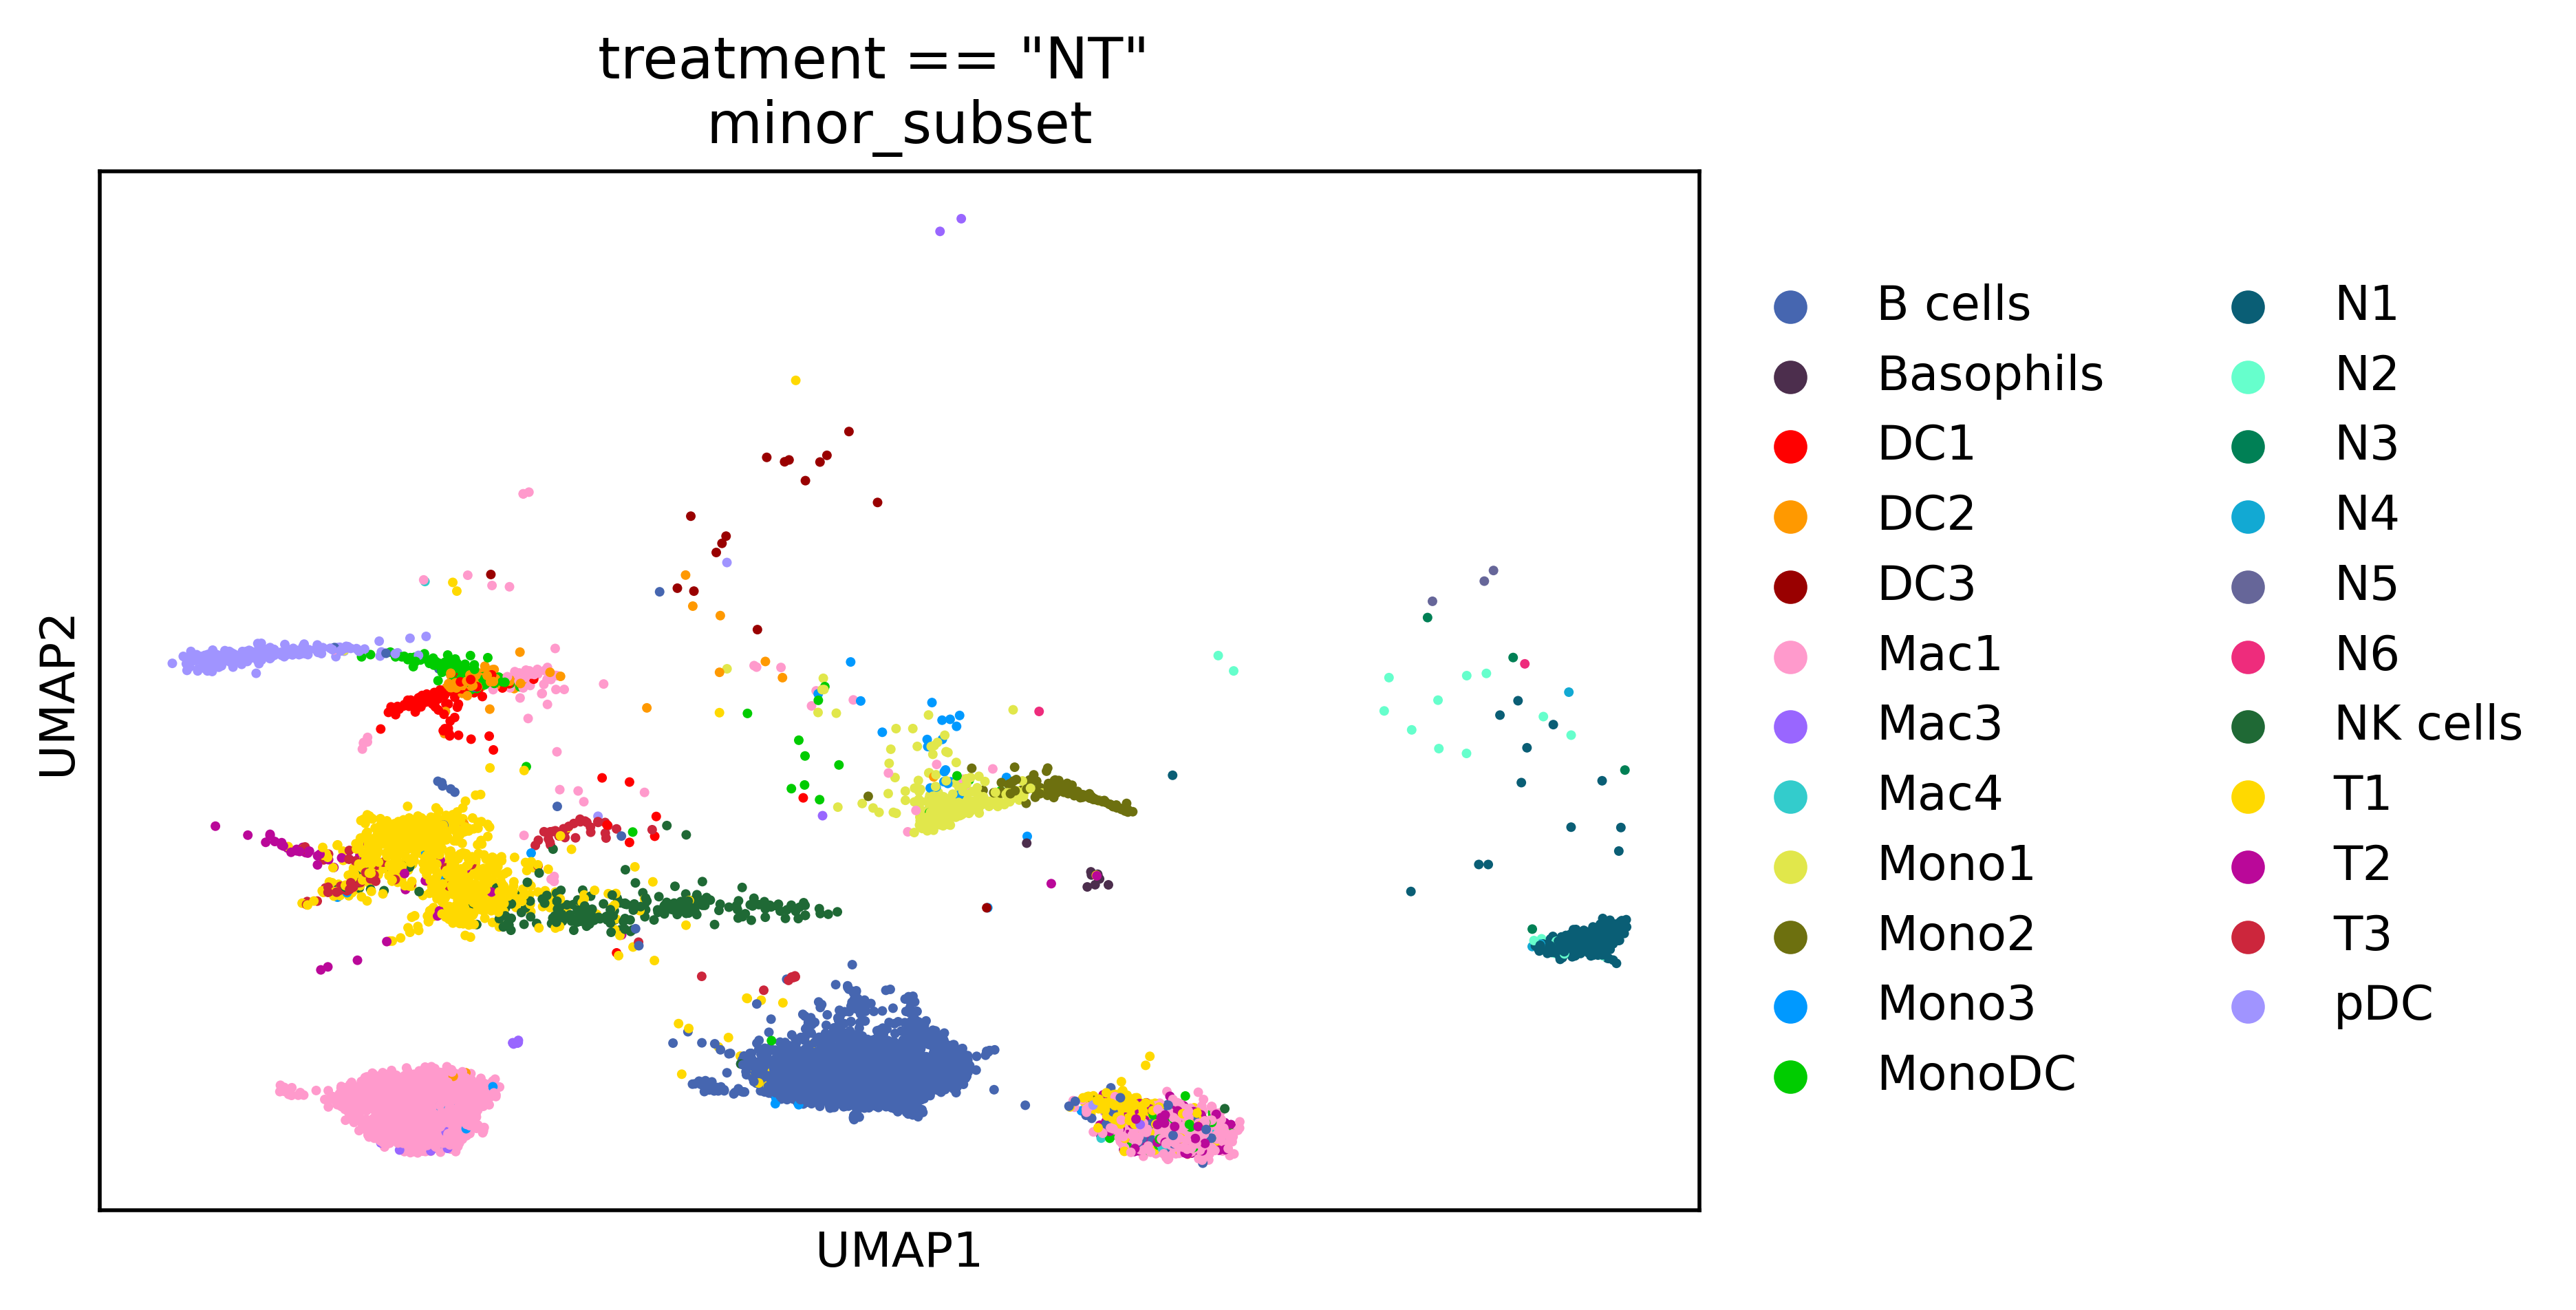

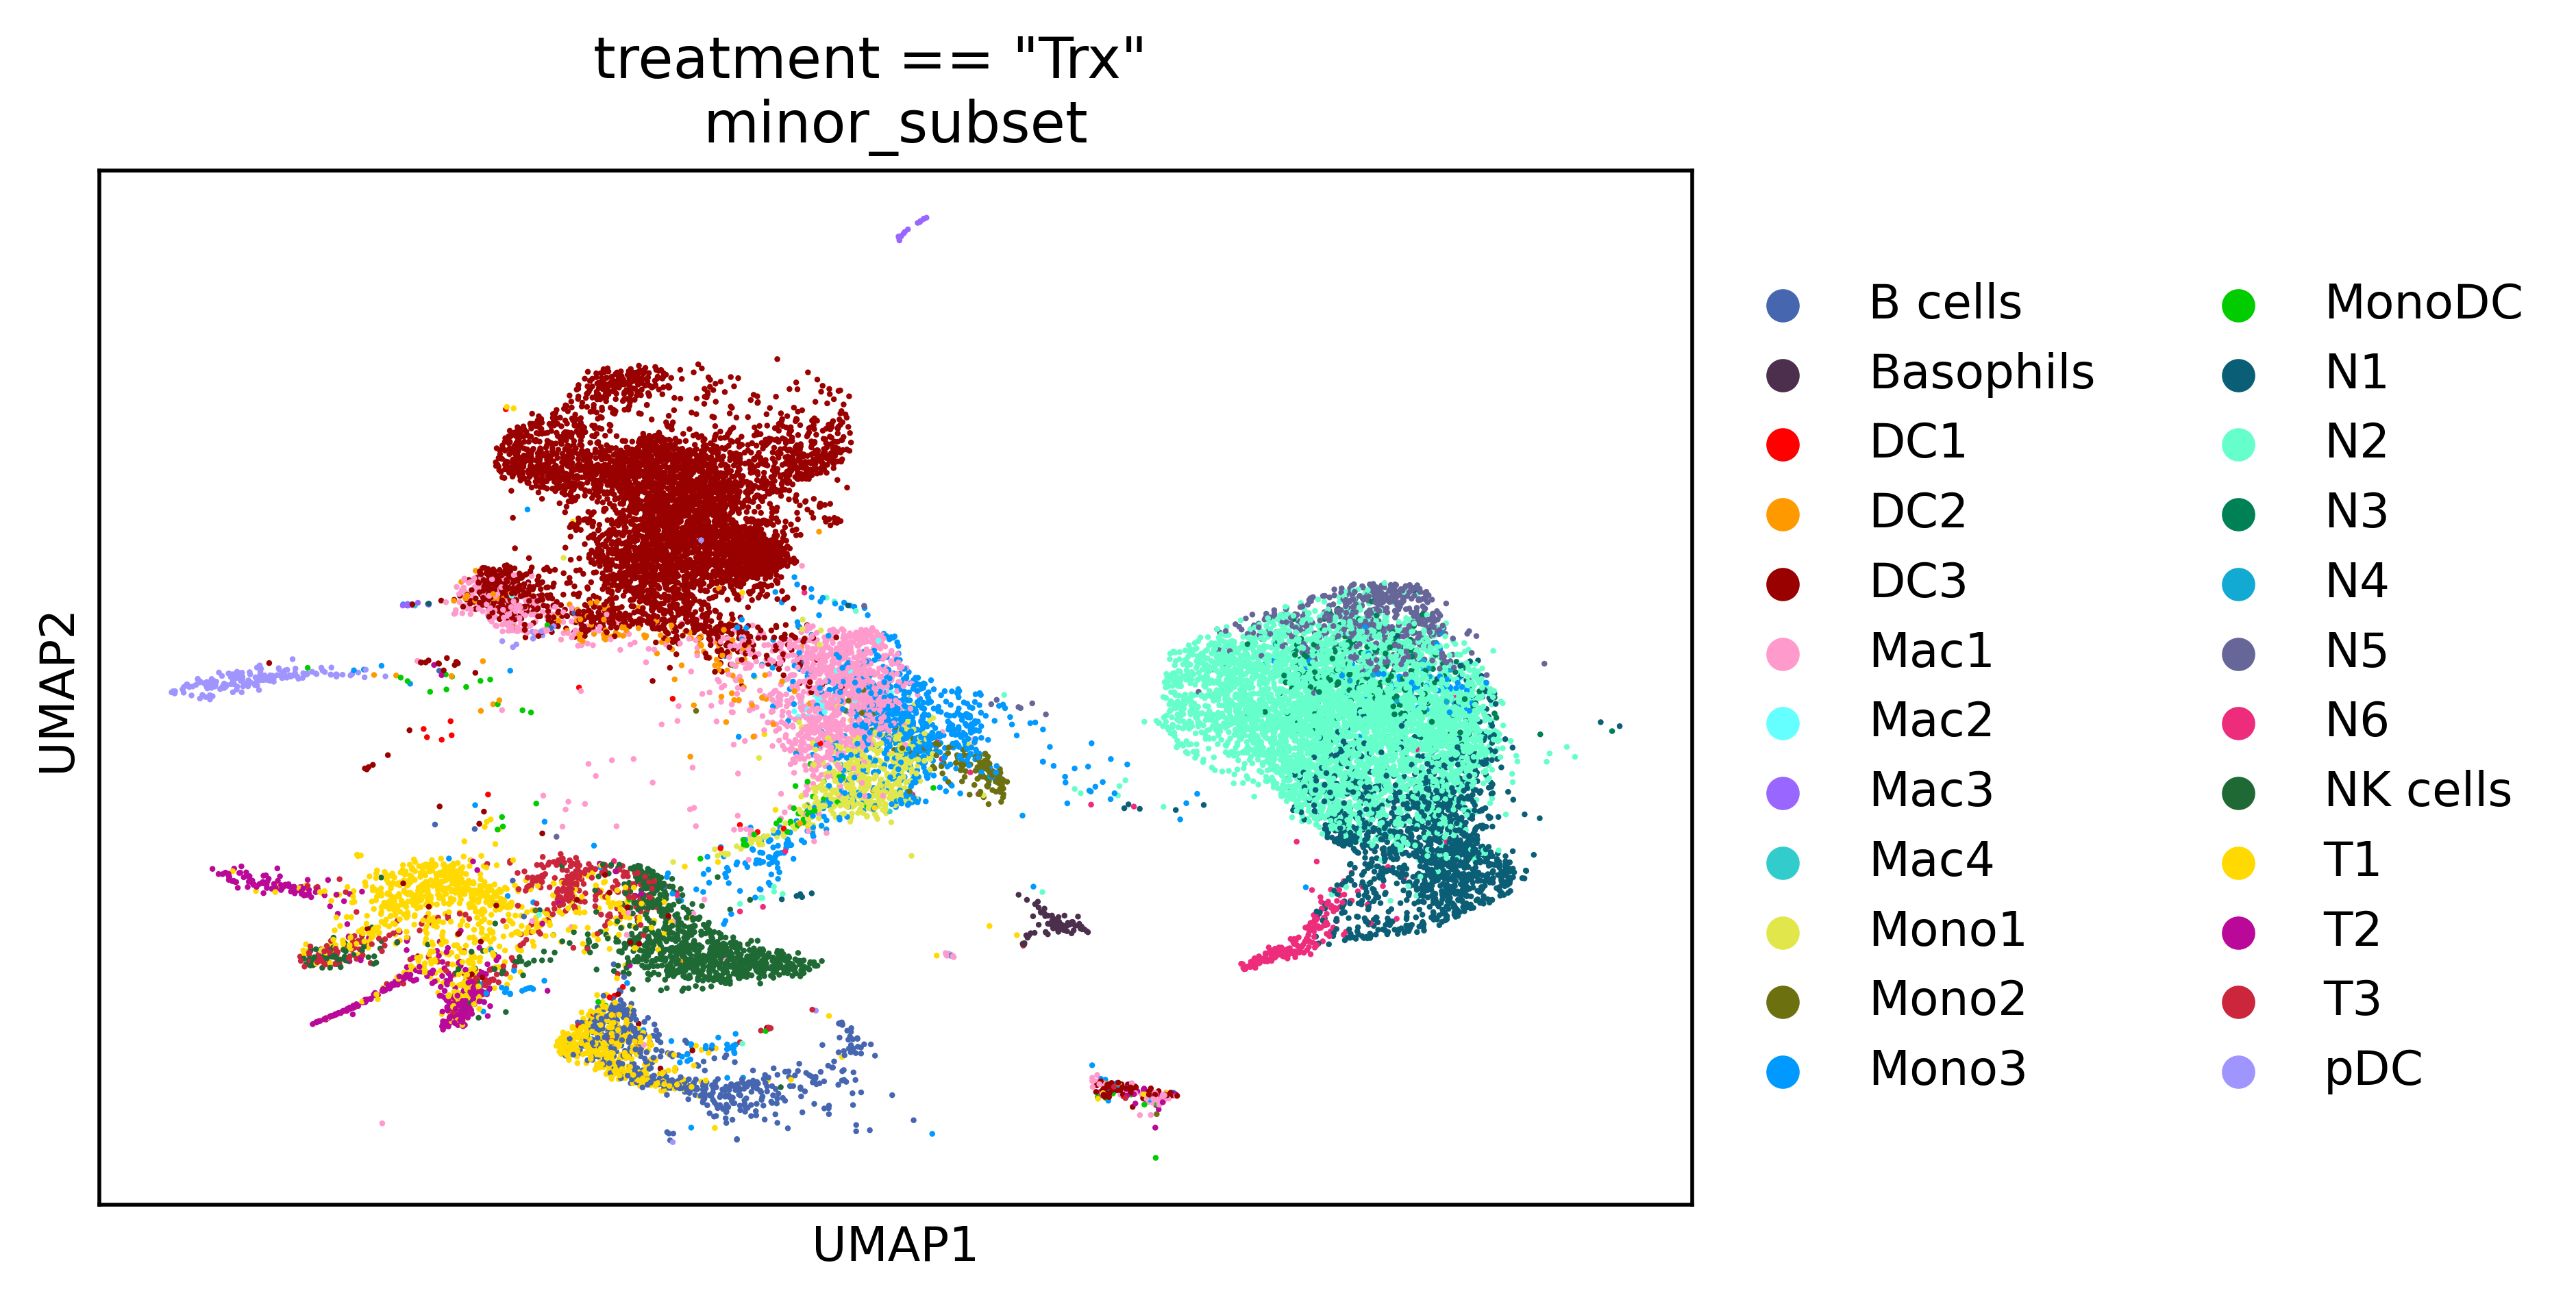

In [8]:
#fig, axes = plt.subplots(1,1, figsize=(5,5), dpi=300)
#fig.suptitle('Tumor', fontsize=32)


#sc.pl.umap(adata[(adata.obs['tissue']=='Liver') & (adata.obs['treatment']=='Trx')], color=['louvain'], norm=matplotlib.colors.PowerNorm(0.2), ax=axes, vmax=20)
#sc.pl.umap(adata[adata.obs['tissue']=='Tumor'], color=['Il12b'], norm=matplotlib.colors.PowerNorm(0.2), cmap='viridis', ax=axes, vmax=20)
#sc.pl.umap(adata[adata.obs['tissue']=='Liver'], color=['C1qa', 'Apoe', 'Marco', 'Axl', 'Flt3', 'Tbc1d4', 'Ccr7'], norm=matplotlib.colors.PowerNorm(0.2), cmap='viridis')



#umap_pre_yfp = sc.pl.umap(adata_raw[adata_raw.obs['tissue']=='Liver'], color=['Il12b', 'minor_subset'], norm=matplotlib.colors.PowerNorm(0.2), cmap='viridis', vmax=69)

# umap_pre_yfp = sc.pl.umap(adata_raw[adata.obs['tissue']=='Liver'], color=['Il12b', 'minor_subset'], 
#                            palette=adata_raw.obs['minor_subset'].cat.categories.map(cell_subset_cmap).tolist(),
#                            norm=matplotlib.colors.SymLogNorm(linthresh=0.25, base=2), cmap='viridis', vmax=500, return_fig=True)

# umap_pre_yfp.set_dpi(500)
#umap_post_yfp = sc.pl.umap(adata[adata.obs['tissue']=='Liver'], color=['Il12b', 'minor_subset'], norm=matplotlib.colors.PowerNorm(0.2), cmap='viridis')



#sc.pl.umap(adata[adata.obs['tissue']=='Tumor'], color=['minor_subset'], norm=matplotlib.colors.PowerNorm(0.2), cmap='winter', ax=axes[1,0])
#sc.pl.umap(adata[adata.obs['tissue']=='Tumor'], color=['Il12b'], norm=matplotlib.colors.PowerNorm(0.2), cmap='winter', ax=axes[1,1])
#sc.pl.umap(adata[adata.obs['tissue']=='Tumor'], color=['marker'], norm=matplotlib.colors.PowerNorm(0.2), cmap='winter', ax=axes[1,2])

#sc.pl.umap(adata[adata.obs['tissue']=='Tumor'], color=['minor_subset', 'Il12b','marker'], norm=matplotlib.colors.PowerNorm(0.2), cmap='winter')

#plt.tight_layout()
ng.umap_plot(adata_raw, filt='tissue == "Liver"', split_by_cats = 'treatment', color=['minor_subset'])
        

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


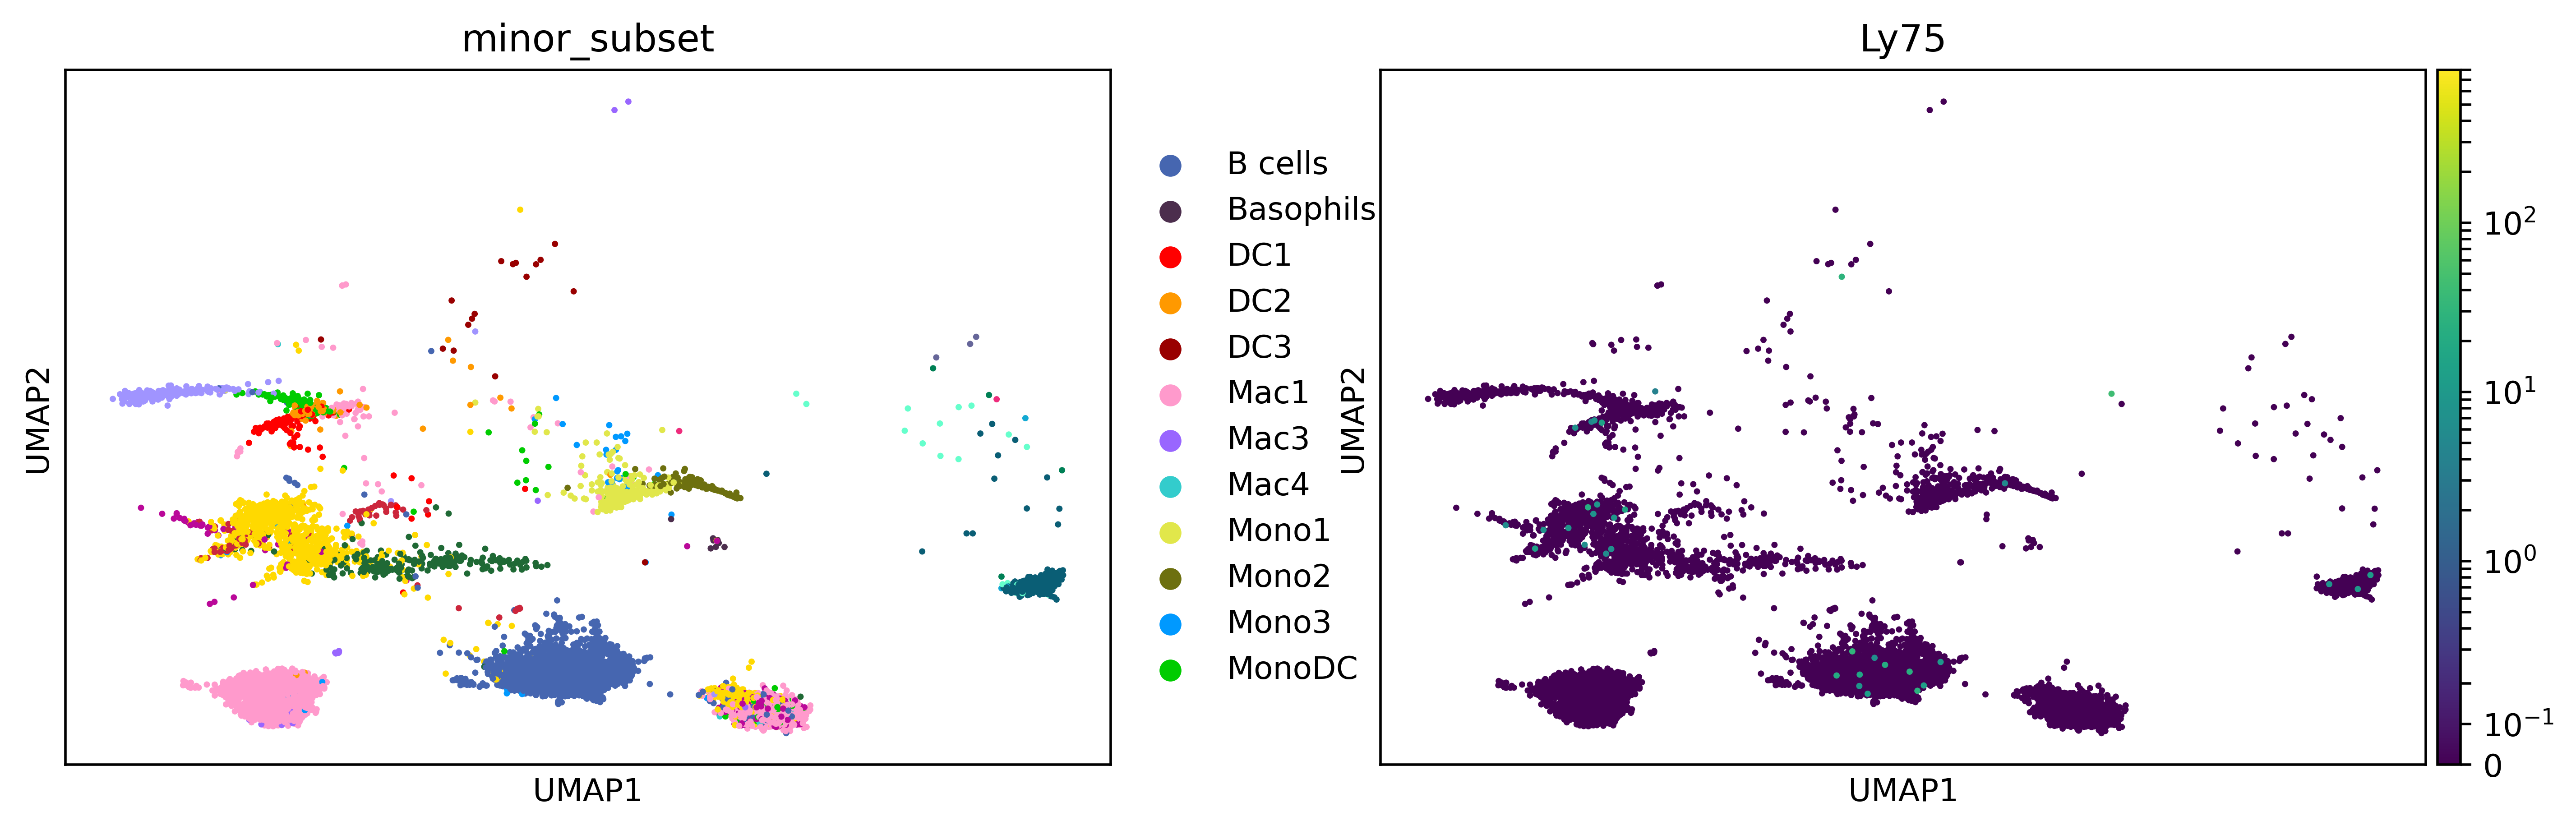

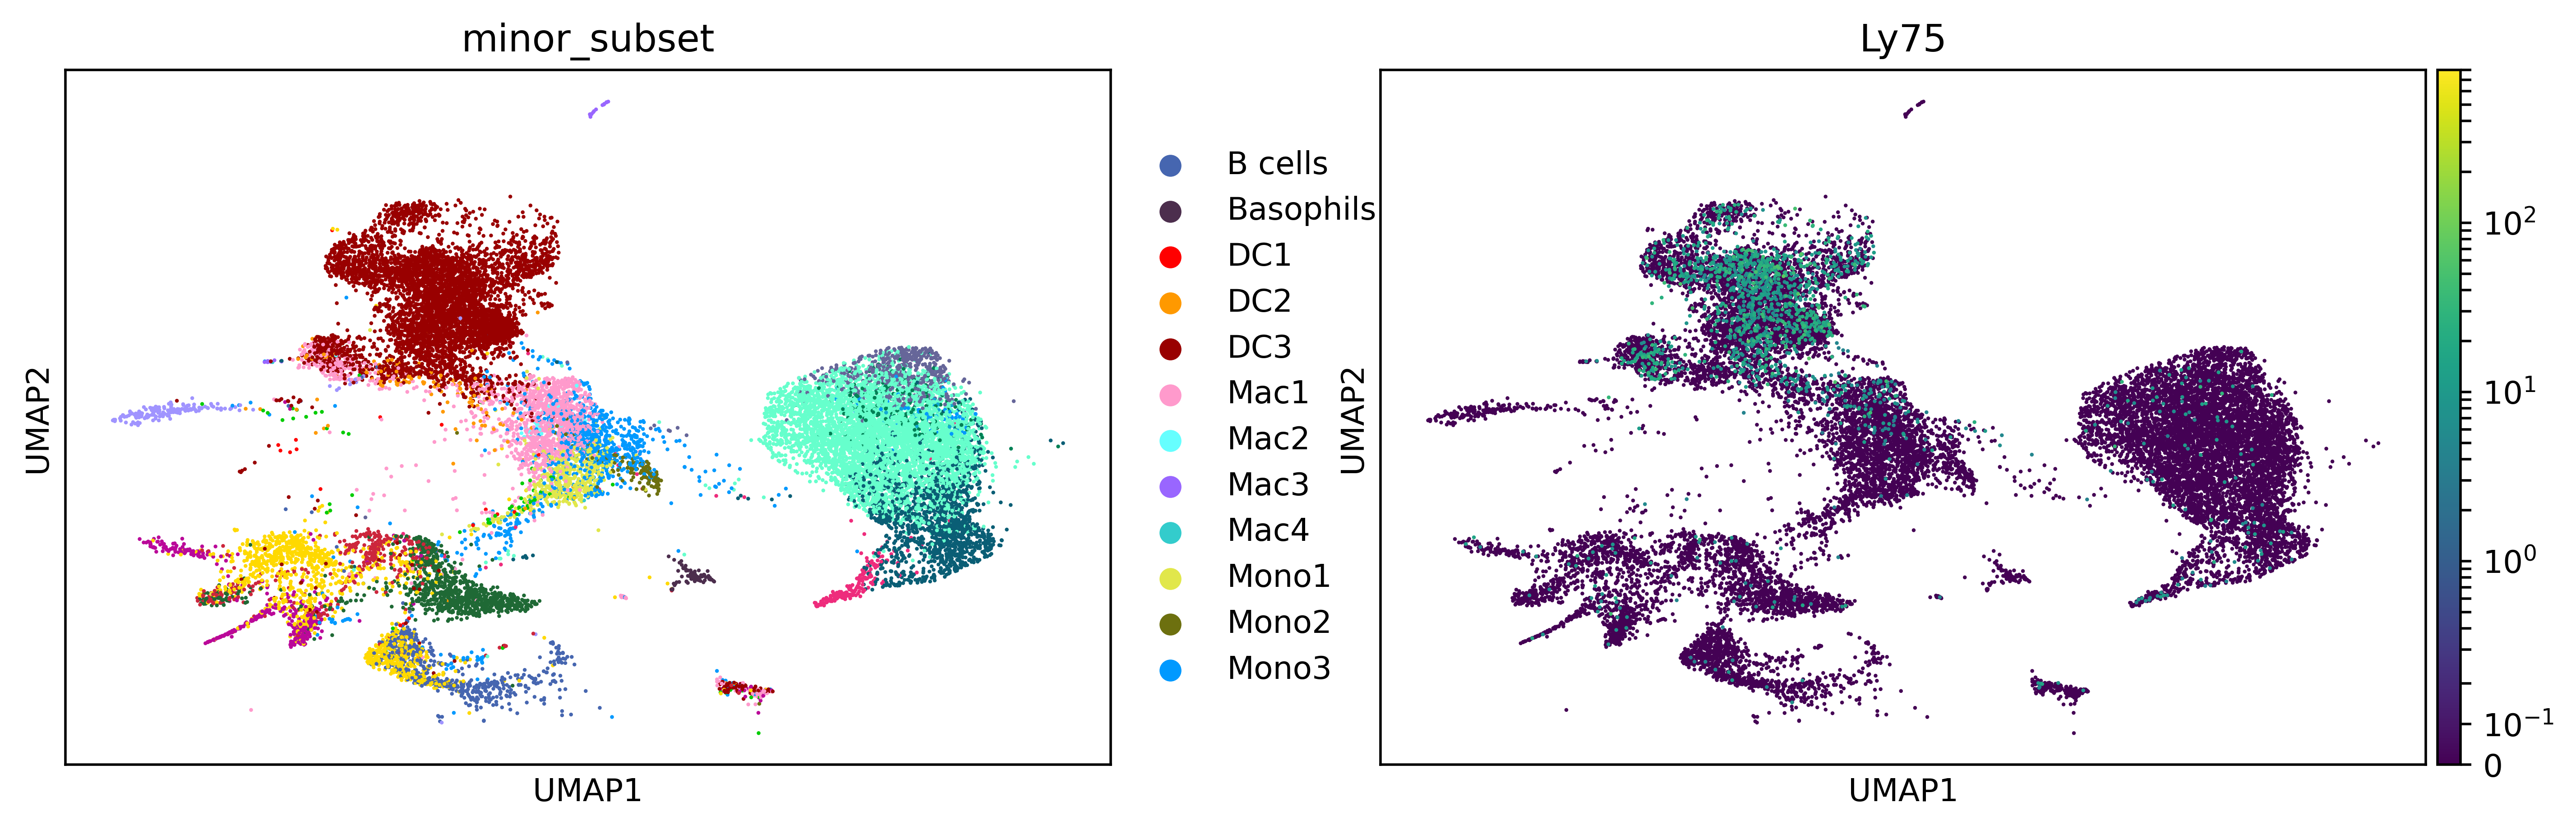

In [30]:
umap_nt = sc.pl.umap(adata_raw[(adata_raw.obs['tissue']=='Liver')&(adata_raw.obs['treatment']=='NT')], vmax=800, norm = matplotlib.colors.SymLogNorm(linthresh=0.25, base=2),
                     color=['minor_subset', 'Ly75'], 
                     palette=adata_raw[(adata_raw.obs['tissue']=='Liver')&(adata_raw.obs['treatment']=='NT')].obs['minor_subset'].cat.categories.map(cell_subset_cmap).tolist(), return_fig=True)
umap_nt.set_dpi(500)


# umap_nt = sc.pl.umap(adata_raw[(adata_raw.obs['tissue']=='Tumor')&(adata_raw.obs['treatment']=='NT')], vmax=800, norm = matplotlib.colors.SymLogNorm(linthresh=0.25, base=2),
#                      color=['minor_subset', 'Adgre1', 'Itgam', 'Batf3', 'Clec4f', 'Spic', 'Irf7', 'C1qa', 'Apoe', 'Marco', 'Axl', 'Flt3', 'Tbc1d4', 'Ccr7'], 
#                      palette=adata_raw.obs['minor_subset'].cat.categories.map(cell_subset_cmap).tolist(), return_fig=True)
#umap_nt.set_dpi(500)

umap_trx = sc.pl.umap(adata_raw[(adata_raw.obs['tissue']=='Liver')&(adata_raw.obs['treatment']=='Trx')], vmax=800, norm = matplotlib.colors.SymLogNorm(linthresh=0.25, base=2),
                    color=['minor_subset', 'Ly75'], 
                    palette= adata_raw[(adata_raw.obs['tissue']=='Liver')&(adata_raw.obs['treatment']=='Trx')].obs['minor_subset'].cat.categories.map(cell_subset_cmap).tolist(), return_fig=True)
umap_trx.set_dpi(500)

In [11]:
adata_raw.obs['minor_subset'].cat.categories.map(cell_subset_cmap).tolist()

['#4666B0',
 '#4c2e4d',
 '#ff0000',
 '#ff9900',
 '#990000',
 '#FF9ACC',
 '#66ffff',
 '#9966ff',
 '#33cccc',
 '#e1e74b',
 '#6d700f',
 '#0099ff',
 '#00cc00',
 '#0a5e75',
 '#66ffcc',
 '#008055',
 '#12a9d3',
 '#666699',
 '#EE2C7C',
 '#1F6935',
 '#FFD900',
 '#BA0899',
 '#CC263C',
 '#a094ff']

In [26]:
[x in adata_raw.var_names for x in ['Adgre1', 'Itgam', 'Batf3', 'Clec4f', 'Spic', 'Irf7', 'C1qa', 'Apoe', 'Marco', 'Axl', 'Flt3', 'Tbc1d4', 'Ccr7', 'Clec9a']]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [315]:
umap_trx.get_axes()[0]

In [10]:
adata.obs.query('tissue == "Liver"')

barcode   group           library_name  \
48-pool1       AAACAAACAGAGGATAAGACACCA       B     Liver_CD45pos_NT_B   
98-pool1       AAACAAACAGAGGATACAATACTT       B     Liver_CD45pos_NT_B   
237-pool1      AAACAAACAGAGGATAGGCCCTTA       B     Liver_CD45pos_NT_B   
246-pool1      AAACAAACAGAGGATAGGGAGGTA       B     Liver_CD45pos_NT_B   
342-pool1      AAACAAACAGAGGATATGGCTACC       B     Liver_CD45pos_NT_B   
...                                 ...     ...                    ...   
1469818-pool5  TGGTTAACTACTCCTTGGTCACAG  I_rep2  Liver_IL12_Trx_I_rep2   
1471336-pool5  TGTTATCAAGAGGATAGGAATAGA  J_rep1  Liver_IL12_Trx_J_rep1   
1471700-pool5  TGTTATCAAGGCTTAGGATTTACC  J_rep2  Liver_IL12_Trx_J_rep2   
1471869-pool5  TGTTATCAAGGCTTAGTTTATCAC  J_rep2  Liver_IL12_Trx_J_rep2   
1472549-pool5  TGTTATCAATTAGACGTACTTGTG       K       Liver_IL12_Trx_K   

                marker  max_mt  min_tot  mito_frac      n_counts  n_genes  \
48-pool1       CD45pos    0.15      200   0.040964  10000.000977      348   
98-pool1       CD45pos    0.15      200   0.005613  10000.000000      581   
237-pool1      CD45pos    0.15      200   0.035451  10000.001953      470   
246-pool1      CD45pos    0.15      200   0.018000  10000.000000      374   
342-pool1      CD45pos    0.15      200   0.035088  10000.000000      318   
...                ...     ...      ...        ...           ...      ...   
1469818-pool5     IL12    0.15      300   0.117005  10000.000977      433   
1471336-pool5     IL12    0.15      200   0.049377   9999.999023     1170   
1471700-pool5     IL12    0.15      250   0.050179  10000.000000      215   
1471869-pool5     IL12    0.15      250   0.043726  10000.000000      550   
1472549-pool5     IL12    0.15      400   0.023161  10000.000977      438   

                pool tissue treatment louvain    cell_type minor_subset  
48-pool1       pool1  Liver        NT       9      MoMacDC         Mac1  
98-pool1       pool1  Liver        NT      20  Neutrophils           N1  
237-pool1      pool1  Liver        NT      12     NK cells     NK cells  
246-pool1      pool1  Liver        NT      13      MoMacDC        Mono2  
342-pool1      pool1  Liver        NT       6      T cells           T1  
...              ...    ...       ...     ...          ...          ...  
1469818-pool5  pool5  Liver       Trx       4      MoMacDC          DC3  
1471336-pool5  pool5  Liver       Trx      14      T cells           T1  
1471700-pool5  pool5  Liver       Trx       4      MoMacDC          DC3  
1471869-pool5  pool5  Liver       Trx       4      MoMacDC          DC3  
1472549-pool5  pool5  Liver       Trx       3      MoMacDC          DC3  

[27463 rows x 15 columns]

In [42]:
adata.obs.loc[:,['tissue','treatment']].apply(lambda x: (x), axis=1).unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [52]:
adata.obs.loc[:,['tissue', 'treatment']

SyntaxError: unexpected EOF while parsing (<ipython-input-52-83f45a9844bb>, line 1)

In [62]:
cat_a = 'tissue'
cat_b = 'treatment'

list(itertools.product(adata.obs[cat_a].cat.categories, adata.obs[cat_b].cat.categories))
queries = {'{} == "{}" & {} == "{}"'.format(cat_a, x, cat_b, y) for x,y in  list(itertools.product(adata.obs[cat_a].cat.categories, adata.obs[cat_b].cat.categories))}

In [64]:
subsetted_obs = []

for q in queries:
#    subsetted_obs.append(print(adata.obs.query(q).head(2))
    
adata.obs.query(q)    


barcode group        library_name   marker  \
1560-pool1     AAACAAACATAGCCTTAATTCCCA     B  Tumor_CD45pos_NT_B  CD45pos   
2328-pool1     AAACAAACCTTAATAGAATTCCCA     A  Tumor_CD45pos_NT_A  CD45pos   
4626-pool1     AAACACGGATAGCCTTAAGGTAAT     B  Tumor_CD45pos_NT_B  CD45pos   
4676-pool1     AAACACGGATAGCCTTAGTTTAGA     B  Tumor_CD45pos_NT_B  CD45pos   
5456-pool1     AAACACGGCTTAATAGATGAAGCA     A  Tumor_CD45pos_NT_A  CD45pos   
...                                 ...   ...                 ...      ...   
1160649-pool2  TGGAAAGCTCGCATAAGAGCCCAT     D  Tumor_CD45pos_NT_D  CD45pos   
1169177-pool2  TGGGAATTTAAGGCTCGTTTACGT     C  Tumor_CD45pos_NT_C  CD45pos   
1169692-pool2  TGGGAATTTCGCATAAACCACGCT     D  Tumor_CD45pos_NT_D  CD45pos   
1175109-pool2  TGGTTAACTAAGGCTCATACCCAG     C  Tumor_CD45pos_NT_C  CD45pos   
1175262-pool2  TGGTTAACTAAGGCTCGCCACATC     C  Tumor_CD45pos_NT_C  CD45pos   

               max_mt  min_tot  mito_frac      n_counts  n_genes   pool  \
1560-pool1       0.15      200   0.008902  10000.000000      251  pool1   
2328-pool1       0.15      200   0.043103   9999.999023      275  pool1   
4626-pool1       0.15      200   0.004695  10000.000000      181  pool1   
4676-pool1       0.15      200   0.023602  10000.000000      540  pool1   
5456-pool1       0.15      200   0.014085   9999.999023      201  pool1   
...               ...      ...        ...           ...      ...    ...   
1160649-pool2    0.15      200   0.013393  10000.000977      329  pool2   
1169177-pool2    0.15      250   0.002336   9999.999023      264  pool2   
1169692-pool2    0.15      200   0.028986  10000.000977      177  pool2   
1175109-pool2    0.15      250   0.051676  10000.000000      482  pool2   
1175262-pool2    0.15      250   0.094059  10000.000000      302  pool2   

              tissue treatment louvain    cell_type minor_subset  
1560-pool1     Tumor        NT       2      MoMacDC         Mac1  
2328-pool1     Tumor        NT       2      MoMacDC         Mac1  
4626-pool1     Tumor        NT       2      MoMacDC         Mac1  
4676-pool1     Tumor        NT       2      MoMacDC         Mac1  
5456-pool1     Tumor        NT       3      MoMacDC          DC3  
...              ...       ...     ...          ...          ...  
1160649-pool2  Tumor        NT       2      MoMacDC         Mac1  
1169177-pool2  Tumor        NT      20  Neutrophils           N3  
1169692-pool2  Tumor        NT       2      MoMacDC         Mac1  
1175109-pool2  Tumor        NT      13      MoMacDC          DC2  
1175262-pool2  Tumor        NT       2      MoMacDC         Mac1  

[1433 rows x 15 columns]

In [308]:
def umap_plot(anndata_raw, color : list, vmax : float, folder='figures', filt='', split_by_cats = '', spring_palette=True, dpi=500, norm='log', cmap='viridis', show_fig=True, return_fig=True, **kwargs):
    
    if filt:
        anndata = anndata_raw[anndata_raw.obs.eval(filt)]
    else:
        anndata = anndata_raw
    
        
    if split_by_cats:
        if type(split_by_cats) == str:

            cat_a = split_by_cats
            queries = ['{} == "{}"'.format(cat_a, x) for x in anndata.obs[cat_a].cat.categories]

        if type(split_by_cats) == list:
            if len(split_by_cats) == 1:

                cat_a = split_by_cats[0]
                queries = ['{} == "{}"'.format(cat_a, x) for x in anndata.obs[cat_a].cat.categories]

            elif len(split_by_cats) == 2:

                cat_a, cat_b = split_by_cats
                queries = {'{} == "{}" & {} == "{}"'.format(cat_a, x, cat_b, y) for x,y in  list(itertools.product(anndata.obs[cat_a].cat.categories, anndata.obs[cat_b].cat.categories))}

            else:
                raise('Too many arguments.')
    else: queries = False
    
    
    
    qdict = {}
    
    
    if queries:
        for q in queries:
            qdict[q] = copy(anndata[anndata.obs.eval(q)])

    if len(qdict) == 0:
        qdict[color] = anndata
        
    qindex = 1
    
    for qtitle, qdata in qdict.items():
        
        qfig = sc.pl.umap(qdata, 
                   cmap = cmap, 
                   norm = matplotlib.colors.SymLogNorm(linthresh=0.25, base=2),
                   color = color,
                   palette = qdata.obs['minor_subset'].cat.categories.map(cell_subset_cmap).tolist(),
                   return_fig=True, **kwargs)


        plt.suptitle(qtitle)
        qfig.set_dpi(dpi)
        
        if qtitle != color:
            figtitle = fix_filename(qtitle) + '_' + fix_filename(color)
        else:
            figtitle = fix_filename(color)
        
        figname = '{}/{}_{}_{}.pdf'.format(folder, figtitle, rz.now(), qindex)
        
        qfig.savefig(fname=figname, dpi=dpi)
        print('{} done!'.format(figname))
        
        if show_fig == False:
            plt.close()
        
        qindex += 1
    
    #print(qdict)

In [309]:
#fix_filename(qtitle) + '_' + fix_filename(color)

umap_plot(adata_raw, split_by_cats=['library_name'], color=['minor_subset'], vmax=500, show_fig=False)

#adata_raw.obs['minor_s ubset'].cat.categories.map(cell_subset_cmap).tolist()

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_NT_A_minor_subset_200409_16h29_1.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_NT_B_minor_subset_200409_16h29_2.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_NT_C_minor_subset_200409_16h29_3.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_NT_D_minor_subset_200409_16h29_4.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_NT_E_minor_subset_200409_16h29_5.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_NT_F_minor_subset_200409_16h29_6.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_NT_G_minor_subset_200409_16h29_7.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_NT_H_minor_subset_200409_16h29_8.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_Trx_A_minor_subset_200409_16h29_9.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_Trx_B_minor_subset_200409_16h29_10.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_Trx_C_minor_subset_200409_16h29_11.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_Trx_D_minor_subset_200409_16h29_12.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_Trx_E_minor_subset_200409_16h29_13.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_Trx_F_minor_subset_200409_16h29_14.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_Trx_G_minor_subset_200409_16h29_15.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_CD45pos_Trx_H_minor_subset_200409_16h29_16.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_IL12_Trx_I_rep1_minor_subset_200409_16h29_17.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_IL12_Trx_I_rep2_minor_subset_200409_16h29_18.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_IL12_Trx_J_rep1_minor_subset_200409_16h29_19.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_IL12_Trx_J_rep2_minor_subset_200409_16h29_20.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Liver_IL12_Trx_K_minor_subset_200409_16h29_21.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_CD45pos_NT_A_minor_subset_200409_16h29_22.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_CD45pos_NT_B_minor_subset_200409_16h29_23.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_CD45pos_NT_C_minor_subset_200409_16h29_24.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_CD45pos_NT_D_minor_subset_200409_16h29_25.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_CD45pos_Trx_A_minor_subset_200409_16h29_26.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_CD45pos_Trx_B_minor_subset_200409_16h29_27.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_CD45pos_Trx_C_minor_subset_200409_16h29_28.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_CD45pos_Trx_D_minor_subset_200409_16h29_29.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_CD45pos_Trx_E_minor_subset_200409_16h29_30.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_CD45pos_Trx_F_minor_subset_200409_16h29_31.pdf done!
figures/library_name_Tumor_CD45pos_Trx_G_minor_subset_200409_16h29_32.pdf done!


Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_CD45pos_Trx_H_minor_subset_200409_16h29_33.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_IL12_Trx_I_rep1_minor_subset_200409_16h29_34.pdf done!


Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_IL12_Trx_I_rep2_minor_subset_200409_16h29_35.pdf done!
figures/library_name_Tumor_IL12_Trx_J_rep1_minor_subset_200409_16h29_36.pdf done!


Trying to set attribute `.uns` of view, copying.


figures/library_name_Tumor_IL12_Trx_J_rep2_minor_subset_200409_16h29_37.pdf done!
figures/library_name_Tumor_IL12_Trx_K_minor_subset_200409_16h29_38.pdf done!


In [290]:
def fix_filename(string):
    return re.sub(r'\W', '', str(string).replace(' == ','_').replace(' & ','_').replace(' ', '_'))

In [119]:
[adata[adata.obs.eval(q)] for q in queries]

[View of AnnData object with n_obs × n_vars = 20042 × 2058 
     obs: 'barcode', 'group', 'library_name', 'marker', 'max_mt', 'min_tot', 'mito_frac', 'n_counts', 'n_genes', 'pool', 'tissue', 'treatment', 'louvain', 'cell_type', 'minor_subset'
     uns: 'spring_params'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs',
 View of AnnData object with n_obs × n_vars = 7421 × 2058 
     obs: 'barcode', 'group', 'library_name', 'marker', 'max_mt', 'min_tot', 'mito_frac', 'n_counts', 'n_genes', 'pool', 'tissue', 'treatment', 'louvain', 'cell_type', 'minor_subset'
     uns: 'spring_params'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs',
 View of AnnData object with n_obs × n_vars = 6462 × 2058 
     obs: 'barcode', 'group', 'library_name', 'marker', 'max_mt', 'min_tot', 'mito_frac', 'n_counts', 'n_genes', 'pool', 'tissue', 'treatment', 'louvain', 'cell_type', 'minor_subset'
     uns: 'spring_params'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs',
 View of AnnData object with n_obs × n_vars = 1433 × 2

In [255]:

re.sub(r'\W', '', 'library_name == "Liver_IL12_Trx_I_rep2"'.replace('==','_'))
#'library_name == "Liver_IL12_Trx_I_rep2"'.replace('\"','').replace(' ','')

'library_name_Liver_IL12_Trx_I_rep2'

In [307]:
import re
from copy import copy

In [144]:
qdict = {}
if queries:
    for q in queries:
        qdict[q] = adata[adata.obs.eval(q)]

if len(qdict):
    sc.pl.umap()

In [212]:
??rz.now()

Object `rz.now()` not found.


In [111]:
if split_by_cats:
    if type(split_by_cats) == str:
        
        cat_a = split_by_cats
        queries = ['{} == "{}"'.format(cat_a, x) for x in anndata.obs[cat_a].cat.categories]
        
    if type(split_by_cats) == list:
        if len(split_by_cats) == 1:
            
            cat_a = split_by_cats[0]
            queries = ['{} == "{}"'.format(cat_a, x) for x in anndata.obs[cat_a].cat.categories]
            
        if (split_by_cats) == 2:
            
            cat_a, cat_b = split_by_cats
            queries = {'{} == "{}" & {} == "{}"'.format(cat_a, x, cat_b, y) for x,y in  list(itertools.product(anndata.obs[cat_a].cat.categories, anndata.obs[cat_b].cat.categories))}
            
        else:
            raise('Too many arguments.')

NameError: name 'anndata' is not defined

In [109]:
queries = ['{} == "{}"'.format(cat_a, x) for x in adata.obs[cat_a].cat.categories]

['tissue == "Liver"', 'tissue == "Tumor"']

In [108]:
adata.obs[cat_a].cat.categories

Index(['Liver', 'Tumor'], dtype='object')